# Xente Fraud Detection Challenge

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

from sklearn.ensemble import RandomForestClassifier

## Import the Datasets

In [2]:
df_train = pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")

## Basic analysis on the Datasets

In [3]:
df_train.head(25)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
df_train.shape

(95662, 16)

In [5]:
df_test.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
5,TransactionId_134338,BatchId_67575,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:03:12Z,2
6,TransactionId_109096,BatchId_52375,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:03:48Z,2
7,TransactionId_14249,BatchId_112552,AccountId_2908,SubscriptionId_2977,CustomerId_3332,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:09:46Z,1
8,TransactionId_69896,BatchId_60867,AccountId_4841,SubscriptionId_3829,CustomerId_3332,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:11:24Z,2
9,TransactionId_91468,BatchId_14721,AccountId_460,SubscriptionId_2976,CustomerId_790,UGX,256,ProviderId_3,ProductId_14,financial_services,ChannelId_3,1161.0,1161,2019-02-13T10:12:08Z,0


In [6]:
df_test.shape

(45019, 15)

Non-fraudulent samples: 95469
Fraudulent samples: 193


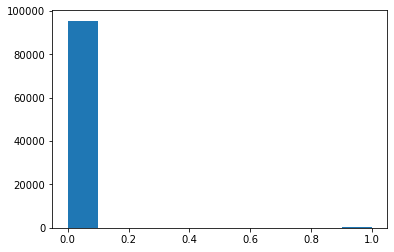

In [7]:
print("Non-fraudulent samples: {}".format(len(df_train[df_train["FraudResult"] == 0])))
print("Fraudulent samples: {}".format(len(df_train[df_train["FraudResult"] == 1])))
plt.hist(df_train["FraudResult"])
plt.show()

The dataset is heavily inbalanced, with only 0.2% of the samples being fraudulent.

## Data Preprocessing

In [8]:
df_train.describe(include="all")

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [9]:
df_train.CurrencyCode.unique()

array(['UGX'], dtype=object)

In [10]:
df_train.CountryCode.unique()

array([256], dtype=int64)

We notice that the variables CurrencyCode and CountryCode have only 1 value and can therefore be removed since they don't bring any relevant information. We also remove these variables from the test set.

In [11]:
df_train = df_train.drop(columns=['CurrencyCode', 'CountryCode'], axis=1)
df_test = df_test.drop(columns=['CurrencyCode', 'CountryCode'], axis=1)

We also can notice that all the columns that refer to id are in the following form: " nameOfTheColumn_Id ". For example:

In [12]:
identifiers = df_train.loc[:, ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId']]
identifiers

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,ChannelId_3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,ChannelId_2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,ChannelId_3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,ChannelId_3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,ChannelId_2
...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,ChannelId_2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,ChannelId_3
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,ChannelId_2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,ChannelId_3


In [13]:
df_train['TransactionId'] = df_train['TransactionId'].str.replace(r'\D', '').astype(int)
df_train['BatchId'] = df_train['BatchId'].str.replace(r'\D', '').astype(int)
df_train['AccountId'] = df_train['AccountId'].str.replace(r'\D', '').astype(int)
df_train['SubscriptionId'] = df_train['SubscriptionId'].str.replace(r'\D', '').astype(int)
df_train['CustomerId'] = df_train['CustomerId'].str.replace(r'\D', '').astype(int)
df_train['ProviderId'] = df_train['ProviderId'].str.replace(r'\D', '').astype(int)
df_train['ProductId'] = df_train['ProductId'].str.replace(r'\D', '').astype(int)
df_train['ChannelId'] = df_train['ChannelId'].str.replace(r'\D', '').astype(int)

In [14]:
df_test['TransactionId'] = df_test['TransactionId'].str.replace(r'\D', '').astype(int)
df_test['BatchId'] = df_test['BatchId'].str.replace(r'\D', '').astype(int)
df_test['AccountId'] = df_test['AccountId'].str.replace(r'\D', '').astype(int)
df_test['SubscriptionId'] = df_test['SubscriptionId'].str.replace(r'\D', '').astype(int)
df_test['CustomerId'] = df_test['CustomerId'].str.replace(r'\D', '').astype(int)
df_test['ProviderId'] = df_test['ProviderId'].str.replace(r'\D', '').astype(int)
df_test['ProductId'] = df_test['ProductId'].str.replace(r'\D', '').astype(int)
df_test['ChannelId'] = df_test['ChannelId'].str.replace(r'\D', '').astype(int)

In [15]:
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [16]:
df_train.dtypes

TransactionId             int32
BatchId                   int32
AccountId                 int32
SubscriptionId            int32
CustomerId                int32
ProviderId                int32
ProductId                 int32
ProductCategory          object
ChannelId                 int32
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [17]:
# Working on the training set
df_train['TransactionStartTime']=df_train['TransactionStartTime'].str.replace('T',' ')
df_train['TransactionStartTime']=df_train['TransactionStartTime'].str.replace('Z','')

# This part is to create 3 columns for the Year, the Month and the Day
TransactionDate=df_train['TransactionStartTime'].str.split(' ').str[0]
df_train['TransactionYear']=TransactionDate.str.split('-').str[0].replace(r'\D', '').astype(int)
df_train['TransactionMonth']=TransactionDate.str.split('-').str[1].replace(r'\D', '').astype(int)
df_train['TransactionDay']=TransactionDate.str.split('-').str[2].replace(r'\D', '').astype(int)


# This part is to create 3 columns for the Hour, the Minute and the Second
TransactionTime=df_train['TransactionStartTime'].str.split(' ').str[1]
df_train['TransactionHour']=TransactionTime.str.split(':').str[0].replace(r'\D', '').astype(int)
df_train['TransactionMinute']=TransactionTime.str.split(':').str[1].replace(r'\D', '').astype(int)
df_train['TransactionSeconde']=TransactionTime.str.split(':').str[2].replace(r'\D', '').astype(int)

# Working on the test set
df_test['TransactionStartTime']=df_test['TransactionStartTime'].str.replace('T',' ')
df_test['TransactionStartTime']=df_test['TransactionStartTime'].str.replace('Z','')


# This part is to create 3 columns for the Year, the Month and the Day
TransactionDate=df_test['TransactionStartTime'].str.split(' ').str[0]
df_test['TransactionYear']=TransactionDate.str.split('-').str[0].replace(r'\D', '').astype(int)
df_test['TransactionMonth']=TransactionDate.str.split('-').str[1].replace(r'\D', '').astype(int)
df_test['TransactionDay']=TransactionDate.str.split('-').str[2].replace(r'\D', '').astype(int)


# This part is to create 3 columns for the Hour, the Minute and the Second
TransactionTime=df_test['TransactionStartTime'].str.split(' ').str[1]
df_test['TransactionHour']=TransactionTime.str.split(':').str[0].replace(r'\D', '').astype(int)
df_test['TransactionMinute']=TransactionTime.str.split(':').str[1].replace(r'\D', '').astype(int)
df_test['TransactionSeconde']=TransactionTime.str.split(':').str[2].replace(r'\D', '').astype(int)

df_train.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49,2,0,2018,11,15,2,18,49
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08,2,0,2018,11,15,2,19,8
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2018-11-15 02:44:21,2,0,2018,11,15,2,44,21
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55,2,0,2018,11,15,3,32,55
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21,2,0,2018,11,15,3,34,21
5,23223,25954,1078,4238,1432,6,3,airtime,3,2000.0,2000,2018-11-15 03:35:10,2,0,2018,11,15,3,35,10
6,118063,118460,2442,1980,2858,5,3,airtime,3,10000.0,10000,2018-11-15 03:44:31,4,0,2018,11,15,3,44,31
7,100640,38561,4841,3829,2858,4,6,financial_services,2,-500.0,500,2018-11-15 03:45:13,2,0,2018,11,15,3,45,13
8,51905,93774,272,4731,598,6,10,airtime,3,500.0,500,2018-11-15 04:14:59,2,0,2018,11,15,4,14,59
9,130161,82409,710,920,1053,1,15,financial_services,3,600.0,600,2018-11-15 04:31:48,2,0,2018,11,15,4,31,48


In [18]:
df_train=df_train.drop(['TransactionStartTime'], axis= 1)
df_test=df_test.drop(['TransactionStartTime'], axis= 1)

In [19]:
df_train.dtypes

TransactionId           int32
BatchId                 int32
AccountId               int32
SubscriptionId          int32
CustomerId              int32
ProviderId              int32
ProductId               int32
ProductCategory        object
ChannelId               int32
Amount                float64
Value                   int64
PricingStrategy         int64
FraudResult             int64
TransactionYear         int32
TransactionMonth        int32
TransactionDay          int32
TransactionHour         int32
TransactionMinute       int32
TransactionSeconde      int32
dtype: object

## Feature Engineering

### Period of the year

In [20]:
print(df_train['TransactionMonth'].unique())

[11 12  1  2]


In [21]:
df_train_month=df_train.loc[df_train['FraudResult'] == 1, 'TransactionMonth']
print(df_train_month.value_counts())
months_occurrences = df_train_month.value_counts()

1     64
12    62
2     53
11    14
Name: TransactionMonth, dtype: int64


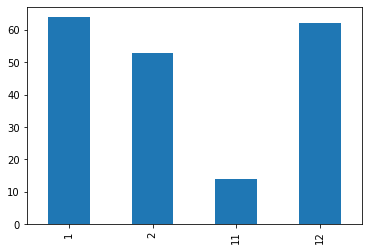

In [22]:
months_occurrences = months_occurrences.sort_index()
graph_months = months_occurrences.plot.bar()

In [23]:
df_train['SuspiciousMonth'] = np.where((df_train['TransactionMonth'] == 1) | (df_train['TransactionMonth'] == 2) | (df_train['TransactionMonth'] == 12), 1, 0)
df_test['SuspiciousMonth'] = np.where((df_test['TransactionMonth'] == 1) | (df_test['TransactionMonth'] == 2) | (df_test['TransactionMonth'] == 12), 1, 0)
df_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde,SuspiciousMonth
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2,0,2018,11,15,2,18,49,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2,0,2018,11,15,2,19,8,0
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,500,2,0,2018,11,15,2,44,21,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2,0,2018,11,15,3,32,55,0
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2,0,2018,11,15,3,34,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,96668,4841,3829,3078,4,6,financial_services,2,-1000.0,1000,2,0,2019,2,13,9,54,9,1
95658,91597,3503,3439,2643,3874,6,10,airtime,3,1000.0,1000,2,0,2019,2,13,9,54,25,1
95659,82501,118602,4841,3829,3874,4,6,financial_services,2,-20.0,20,2,0,2019,2,13,9,54,35,1
95660,136354,70924,1346,652,1709,6,19,tv,3,3000.0,3000,2,0,2019,2,13,10,1,10,1


### PricingStrategy

In [24]:
print(df_train['PricingStrategy'].unique())

[2 4 1 0]


In [25]:
df_train_pricing_strat=df_train.loc[df_train['FraudResult'] == 1, 'PricingStrategy']
print(df_train_pricing_strat.value_counts())
princing_strat_occurrences = df_train_pricing_strat.value_counts()

2    139
0     36
4     11
1      7
Name: PricingStrategy, dtype: int64


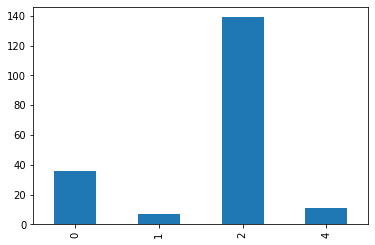

In [26]:
princing_strat_occurrences = princing_strat_occurrences.sort_index()
graph_pricing_strat = princing_strat_occurrences.plot.bar()

Therefore it would be a good choice to make a feature to signal to the model that the pricing strategy is a target variable. Indeed, it is easy to see that the fraud are committed more often with the strategy 2 and 0. In this case we'll neglect the 1 and 4 strategy in front of the values of our other strategies. 
To make it usable by our model, we'll use the Ordinal encoding method. But instead of replacing the 'PricingStrategy' column, we'll just add a new one with a value of '1' if the strategy is 0 or 2 and a value of '0' instead.

In [27]:
# df_train['SuspiciousStrategy'] = np.where((df_train['PricingStrategy'] == 0) | (df_train['PricingStrategy'] == 2), 1, 0)
# df_test['SuspiciousStrategy'] = np.where((df_test['PricingStrategy'] == 0) | (df_test['PricingStrategy'] == 2), 1, 0)

# treatment for the train dataset
train_conditions = [(df_train['PricingStrategy'] == 0), (df_train['PricingStrategy'] == 1), (df_train['PricingStrategy'] == 2), (df_train['PricingStrategy'] == 4)]
train_choices = [2, 0, 3, 1]
df_train['SuspiciousStrategy'] = np.select(train_conditions, train_choices, default=np.nan).astype(int)

# treatment for the test dataset
test_conditions = [(df_test['PricingStrategy'] == 0), (df_test['PricingStrategy'] == 1), (df_test['PricingStrategy'] == 2), (df_test['PricingStrategy'] == 4)]
test_choices = [2, 0, 3, 1]
df_test['SuspiciousStrategy'] = np.select(test_conditions, test_choices, default=np.nan).astype(int)

df_train = df_train.drop(['PricingStrategy'], axis=1)
df_test = df_test.drop(['PricingStrategy'], axis=1)


df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde,SuspiciousMonth,SuspiciousStrategy
0,50600,35028,2441,4426,2857,5,3,airtime,3,1000.0,1000,2019,2,13,10,1,40,1,1
1,95109,45139,3439,2643,3874,5,15,financial_services,3,2000.0,2000,2019,2,13,10,2,12,1,3
2,47357,74887,4841,3829,2857,4,6,financial_services,2,-50.0,50,2019,2,13,10,2,30,1,3
3,28185,11025,2685,4626,3105,5,10,airtime,3,3000.0,3000,2019,2,13,10,2,38,1,1
4,22140,29804,4841,3829,3105,4,6,financial_services,2,-60.0,60,2019,2,13,10,2,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,financial_services,3,-5000.0,5000,2019,3,14,23,56,28,0,3
45015,24829,53630,4803,1738,5272,3,10,airtime,3,10000.0,10000,2019,3,14,23,57,38,0,0
45016,102920,112209,4817,4613,5286,3,10,airtime,3,10000.0,10000,2019,3,14,23,59,17,0,0
45017,128439,58734,4841,3829,5286,4,6,financial_services,3,-5000.0,5000,2019,3,14,23,59,39,0,3


In [28]:
df_train['SuspiciousStrategy'].value_counts()

3    79848
1    13562
0     1867
2      385
Name: SuspiciousStrategy, dtype: int64

### Amount ( debits or credits)

In [29]:
print((df_train['Amount'] > 0).value_counts())

True     57473
False    38189
Name: Amount, dtype: int64


<BarContainer object of 2 artists>

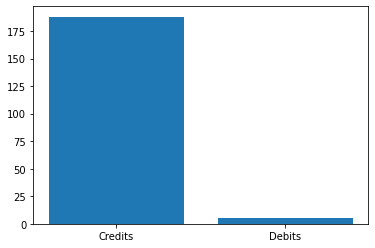

In [30]:
amount_values = df_train.loc[df_train['FraudResult'] == 1, 'Amount']
amount_occurrences = (amount_values > 0).value_counts()
plt.bar(["Credits", "Debits"], amount_occurrences)

Therefore it would be a good choice to make a feature to signal to the model that the type of payment is a target variable. Indeed, it is easy to see that the fraud are committed more often with the credit cards.
To make it usable by our model, we'll use the Ordinal encoding method. We'll replace the `Amount` column by a new one with only binary values : 1 if the `Amount` value is negative (credits) and 0 if the `Amount` value is positive (debits).

In [31]:
df_train['OldSuspiciousPayment'] = np.where((df_train['Amount'] < 0), 1, 0)
df_test['OldSuspiciousPayment'] = np.where((df_test['Amount'] < 0), 1, 0)

alpha = pd.get_dummies(df_train.OldSuspiciousPayment, prefix='Type_Payment_')
df_alpha = pd.DataFrame(alpha)
df_train['Debits'] = df_alpha.Type_Payment__0
df_train['Credits'] = df_alpha.Type_Payment__1

beta = pd.get_dummies(df_test.OldSuspiciousPayment, prefix='Type_Payment_')
df_beta = pd.DataFrame(beta)
df_test['Debits'] = df_beta.Type_Payment__0
df_test['Credits'] = df_beta.Type_Payment__1
df_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,TransactionMonth,TransactionDay,TransactionHour,TransactionMinute,TransactionSeconde,SuspiciousMonth,SuspiciousStrategy,OldSuspiciousPayment,Debits,Credits
0,50600,35028,2441,4426,2857,5,3,airtime,3,1000.0,...,2,13,10,1,40,1,1,0,1,0
1,95109,45139,3439,2643,3874,5,15,financial_services,3,2000.0,...,2,13,10,2,12,1,3,0,1,0
2,47357,74887,4841,3829,2857,4,6,financial_services,2,-50.0,...,2,13,10,2,30,1,3,1,0,1
3,28185,11025,2685,4626,3105,5,10,airtime,3,3000.0,...,2,13,10,2,38,1,1,0,1,0
4,22140,29804,4841,3829,3105,4,6,financial_services,2,-60.0,...,2,13,10,2,58,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,116198,117348,4841,3829,5225,4,6,financial_services,3,-5000.0,...,3,14,23,56,28,0,3,1,0,1
45015,24829,53630,4803,1738,5272,3,10,airtime,3,10000.0,...,3,14,23,57,38,0,0,0,1,0
45016,102920,112209,4817,4613,5286,3,10,airtime,3,10000.0,...,3,14,23,59,17,0,0,0,1,0
45017,128439,58734,4841,3829,5286,4,6,financial_services,3,-5000.0,...,3,14,23,59,39,0,3,1,0,1


In [32]:
df_train = df_train.set_index('TransactionId')
df_test = df_test.set_index('TransactionId')

In [33]:
y = df_train.FraudResult
df_train = df_train.drop(['FraudResult'], axis= 1)

## First Try

In [34]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9978257233651112


In [35]:
#Oversampling the data
smote = SMOTE(random_state = 101)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=27)

print("This is the samples before the oversampling : ")
print(y_train.value_counts())
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)


# dropping the 'ProductCategory' column because it contains strings
X = X.drop(['ProductCategory'], axis=1)
X_train = X_train.drop(['ProductCategory'], axis=1)
X_test = X_test.drop(['ProductCategory'], axis=1)

# separe the minority and majority classes
not_fraud = X[X.FraudResult==0]
fraud = X[X.FraudResult==1]


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("This is the samples after the oversampling : ")
print(y_train_sm.value_counts())

This is the samples before the oversampling : 
0    71605
1      141
Name: FraudResult, dtype: int64
This is the samples after the oversampling : 
0    71605
1    71605
Name: FraudResult, dtype: int64


In [36]:
# training model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train_sm, y_train_sm)

# prdict on test set
rfc_pred = rfc.predict(X_test)

print(y_test.value_counts())
print(len(rfc_pred))

print(f1_score(y_test, rfc_pred))

0    23864
1       52
Name: FraudResult, dtype: int64
23916
0.8349514563106797


In [37]:
df_test = df_test.drop(['ProductCategory'], axis=1)
print(df_test)

               BatchId  AccountId  SubscriptionId  CustomerId  ProviderId  \
TransactionId                                                               
50600            35028       2441            4426        2857           5   
95109            45139       3439            2643        3874           5   
47357            74887       4841            3829        2857           4   
28185            11025       2685            4626        3105           5   
22140            29804       4841            3829        3105           4   
...                ...        ...             ...         ...         ...   
116198          117348       4841            3829        5225           4   
24829            53630       4803            1738        5272           3   
102920          112209       4817            4613        5286           3   
128439           58734       4841            3829        5286           4   
45927            98308       4593            3866        5057           5   

In [38]:
test_id = "TransactionId_"+df_test["TransactionId"].astype(str)
predictions = rfc.predict(df_test)
data = {'TransactionId': test_id, 'FraudResult': predictions}
submission = pd.DataFrame(data)
submission.to_csv('sub.csv',index=False)

KeyError: 'TransactionId'